# Collections

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
def parseFishTable(url,north):
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'lxml')
    if north:
        my_table = soup.find('div',{'title':'Northern Hemisphere'})
    else:
        my_table = soup.find('div',{'title':'Southern Hemisphere'})

    my_table= my_table.find('table',{'class':'roundy sortable'})
    
    col_names = my_table.findAll('th')
    cols = []
    for c in col_names:
        cols.append(c.getText().strip())
        
    row_cells = my_table.findAll('td')
    singleRow, rows, cnt = [],[],0
    for r in row_cells:
        singleRow.append(r.getText().strip())
        cnt += 1
        if cnt == len(cols):
            rows.append(singleRow)
            singleRow,cnt = [],0
            
    image_urls = my_table.findAll('a',{'class':'image-thumbnail'})
    images = []
    for i in image_urls:
        images.append(i.get('href'))
        
    df = pd.DataFrame(rows, columns=cols)
    df['Image'] = images
    df = df.replace({'✓':1, '-':0})
    
    return df

In [3]:
fish_north = parseFishTable('https://animalcrossing.fandom.com/wiki/Fish_(New_Horizons)',True)
fish_south = parseFishTable('https://animalcrossing.fandom.com/wiki/Fish_(New_Horizons)',False)

In [4]:
fish_north.head(2)

,Name,Image,Price,Location,Shadow size,Time,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Bitterling,https://vignette.wikia.nocookie.net/animalcros...,900,River,1,All day,1,1,1,0,0,0,0,0,0,0,1,1
1,Pale chub,https://vignette.wikia.nocookie.net/animalcros...,200,River,1,9 AM - 4 PM,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
fish_south.head(2)

,Name,Image,Price,Location,Shadow size,Time,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Bitterling,https://vignette.wikia.nocookie.net/animalcros...,900,River,1,All day,0,0,0,0,1,1,1,1,1,0,0,0
1,Pale chub,https://vignette.wikia.nocookie.net/animalcros...,200,River,1,9am - 4pm,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
def parseBugTable(url,north):
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'lxml')
    if north:
        my_table = soup.find('div',{'title':'Northern Hemisphere'})
    else:
        my_table = soup.find('div',{'title':'Southern Hemisphere'})

    my_table= my_table.find('table',{'class':'sortable'})
    
    col_names = my_table.findAll('th')
    cols = []
    for c in col_names:
        cols.append(c.getText().strip())
        
    row_cells = my_table.findAll('td')
    singleRow, rows, cnt = [],[],0
    for r in row_cells:
        singleRow.append(r.getText().strip())
        cnt += 1
        if cnt == len(cols):
            rows.append(singleRow)
            singleRow,cnt = [],0
            
    image_urls = my_table.findAll('a',{'class':'image-thumbnail'})
    images = []
    for i in image_urls:
        images.append(i.get('href'))
    
    df = pd.DataFrame(rows, columns=cols)
    df['Image'] = images
    df = df.replace({'✓':1, '-':0})
    
    return df

In [7]:
bug_north = parseBugTable('https://animalcrossing.fandom.com/wiki/Bugs_(New_Horizons)',True)
bug_south = parseBugTable('https://animalcrossing.fandom.com/wiki/Bugs_(New_Horizons)',False)

In [8]:
bug_north.head(2)

,Name,Image,Price,Location,Time,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Common butterfly,https://vignette.wikia.nocookie.net/animalcros...,160,Flying,4 AM - 7 PM,1,1,1,1,1,1,0,0,1,1,1,1
1,Yellow butterfly,https://vignette.wikia.nocookie.net/animalcros...,160,Flying,4 AM - 7 PM,0,0,1,1,1,1,0,0,1,1,0,0


In [9]:
bug_south.head(2)

,Name,Image,Price,Location,Time,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Common butterfly,https://vignette.wikia.nocookie.net/animalcros...,160,Flying,4am - 7pm,0,0,1,1,1,1,1,1,1,1,1,1
1,Yellow butterfly,https://vignette.wikia.nocookie.net/animalcros...,160,Flying,4am - 7pm,0,0,1,1,0,0,0,0,1,1,1,1


In [10]:
def parseVillagerTable(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'lxml')
    my_table= soup.find('table',{'class':'roundy sortable'})
    
    col_names = my_table.findAll('th')
    cols = []
    for c in col_names:
        cols.append(c.getText().strip())
        
    row_cells = my_table.findAll('td')
    singleRow, rows, cnt = [],[],0
    for r in row_cells:
        singleRow.append(r.getText().strip())
        cnt += 1
        if cnt == len(cols):
            rows.append(singleRow)
            singleRow,cnt = [],0
            
    image_urls = my_table.findAll('a',{'class':'image-thumbnail'})
    images = []
    for i in image_urls:
        images.append(i.get('href'))
    
    df = pd.DataFrame(rows, columns=cols)
    df['Image'] = images
    df = df.replace({'✓':1, '-':0})
    
    return df

In [11]:
villagers = parseVillagerTable('https://animalcrossing.fandom.com/wiki/Villager_list_(New_Horizons)')
villagers.head(2)

,Name,Image,Personality,Species,Birthday,Catchphrase,Hobbies
0,Admiral,https://vignette.wikia.nocookie.net/animalcros...,♂ Cranky,Bird,January 27th,"""aye aye""",Nature
1,Agent S,https://vignette.wikia.nocookie.net/animalcros...,♀ Peppy,Squirrel,July 2nd,"""sidekick""",Fitness


# Save Collection Data

In [12]:
villagers.to_json('villagers.json',orient='records')

In [13]:
fish_north.to_json('fishNorth.json',orient='records')
fish_south.to_json('fishSouth.json',orient='records')
bug_north.to_json('bugNorth.json',orient='records')
bug_south.to_json('bugSouth.json',orient='records')

In [14]:
bug_north['Image'].to_json('bugImages.json')

In [15]:
fish_north['Image'].to_json('fishImages.json')

# WordCloud

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image

In [17]:
df_reviews = pd.read_csv('critic.csv')
df_reviews.head(3)

,grade,publication,text,date
0,100,Pocket Gamer UK,"Animal Crossing; New Horizons, much like its p...",2020-03-16
1,100,Forbes,Know that if you’re overwhelmed with the world...,2020-03-16
2,100,Telegraph,"With a game this broad and lengthy, there’s mo...",2020-03-16


In [18]:
# clean the data for wordcloud (combine the reviews text into one large string)
text = ''
for val in df_reviews['text']:
    tokens = val.split()
    new_tokens = []
    for t in tokens:
        word = re.sub(r'[^\w]$','',t).lower()
        new_tokens += [word]
    text+=' '.join(new_tokens)+' '

In [19]:
# create the stop words list
my_stopwords = ['animal','crossing','new','horizon',
                'horizons','series','game','will','be',
               'the','so','much','us','you','re']
sw = list(STOPWORDS)+my_stopwords

In [20]:
# load the image for shaping the word cloud
nook = Image.open('nook_mask.jpg')

In [21]:
wc = WordCloud(height=2388,width=1668,
              background_color='white',
               mask=np.array(nook),
              stopwords = sw).generate(text)

In [22]:
# save the output
wc.to_file('wordcloud.jpg')

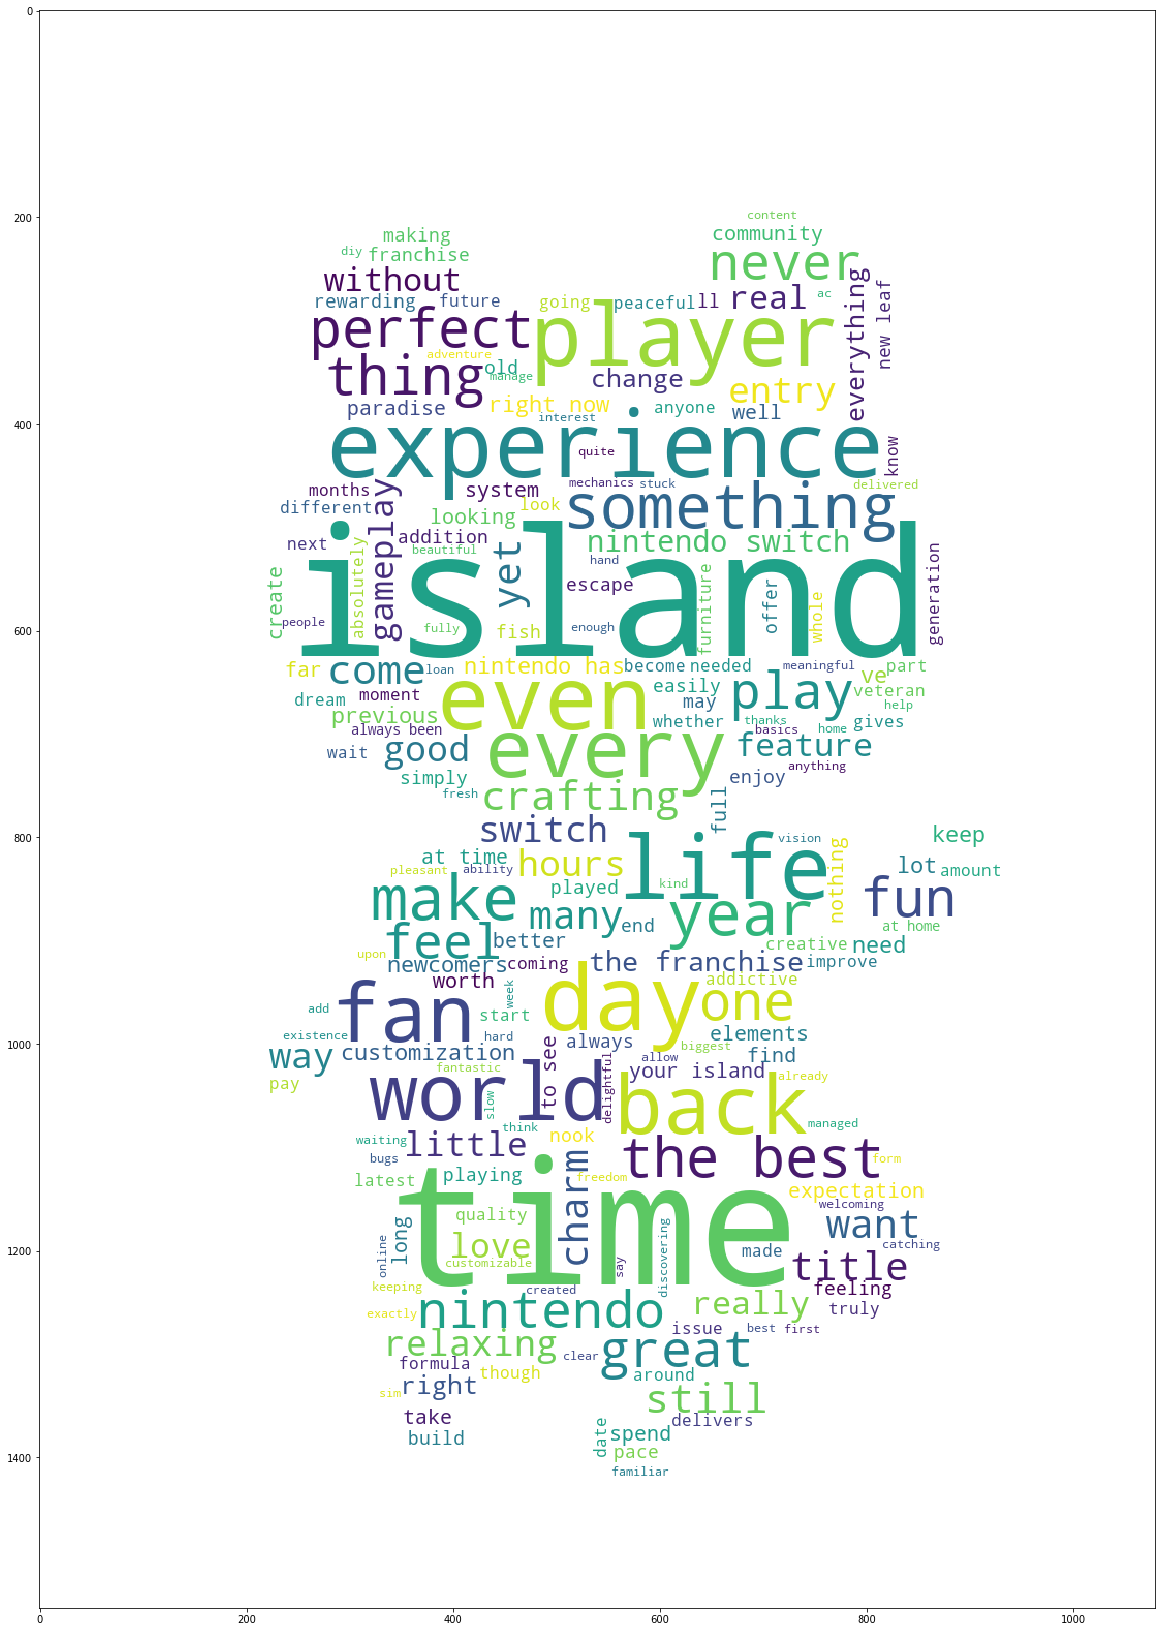

In [23]:
plt.figure(figsize=(20,30))
plt.imshow(wc)